<a href="https://colab.research.google.com/github/aryanrai14022008/ml-projects/blob/main/medicalinsurancepredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [87]:
from sklearn import metrics

In [88]:
data=pd.read_csv('/content/insurance.csv')

In [89]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
data.shape

(1338, 7)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [92]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [93]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-1470617994.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


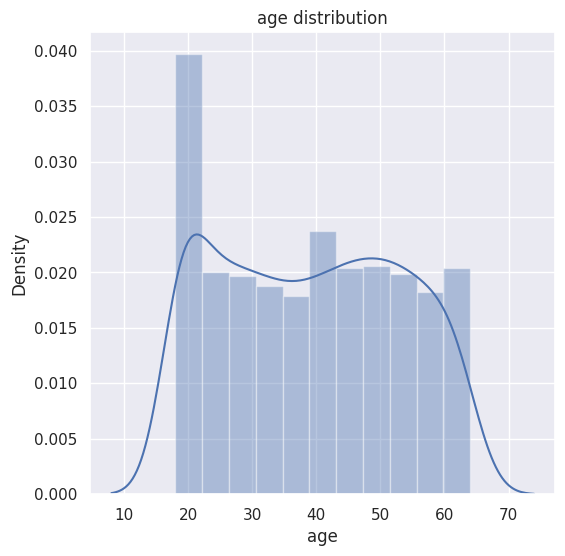

In [94]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('age distribution')

plt.show()


In [95]:
data['sex'].value_counts()


,count
sex,
male,676
female,662


/tmp/ipython-input-2479712310.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


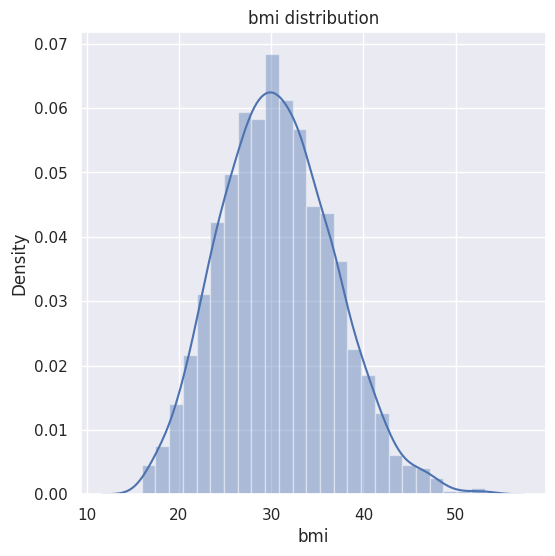

In [96]:
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('bmi distribution')

plt.show()

In [97]:
data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


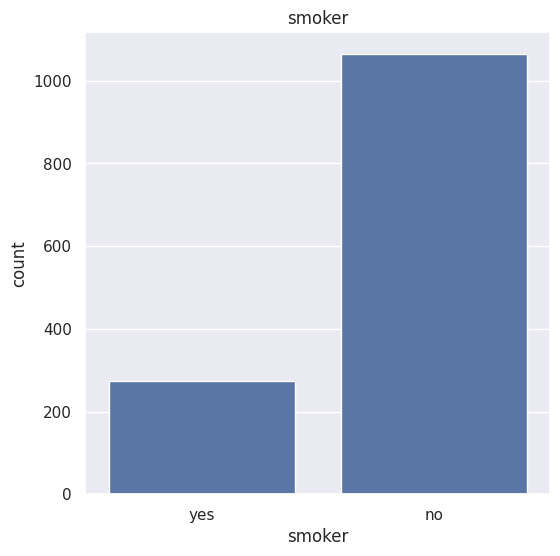

In [98]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data)
plt.title('smoker')
plt.show()

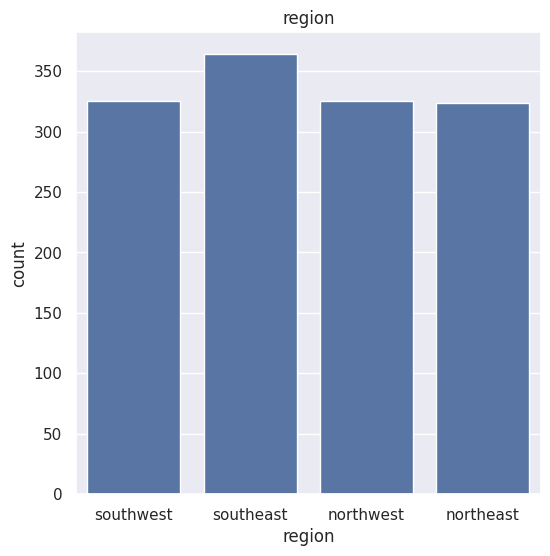

In [99]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=data)
plt.title('region')
plt.show()

/tmp/ipython-input-2757994499.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


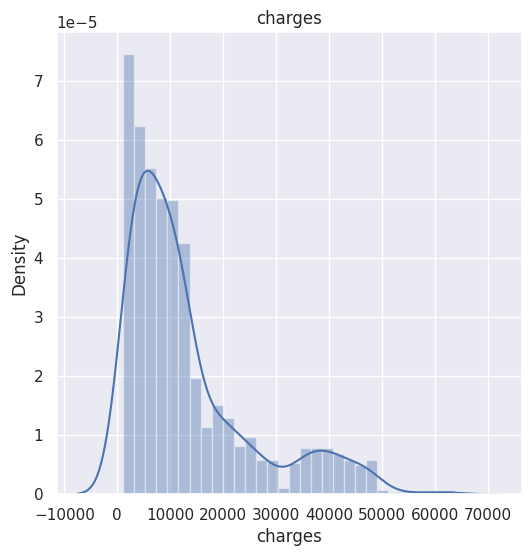

In [100]:
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('charges')

plt.show()

In [101]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)

/tmp/ipython-input-3155281795.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':0,'female':1}},inplace=True)


In [102]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [103]:
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

/tmp/ipython-input-725382032.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':0,'no':1}},inplace=True)


In [104]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


In [105]:
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

/tmp/ipython-input-3766042076.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [106]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [107]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [108]:
x=data.drop(columns='charges',axis=1)

In [109]:
y=data['charges']

In [110]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [111]:
xtrain

,age,sex,bmi,children,smoker,region
882,21,1,22.135,0,1,2
505,37,0,30.875,3,1,3
798,58,1,33.100,0,1,1
792,22,1,23.180,0,1,2
201,48,1,32.230,1,1,0
...,...,...,...,...,...,...
466,60,1,28.700,1,1,1
299,48,1,28.880,1,1,3
493,61,0,43.400,0,1,1
527,51,1,25.800,1,1,1


In [112]:
ytrain

,charges
882,2585.85065
505,6796.86325
798,11848.14100
792,2731.91220
201,8871.15170
...,...
466,13224.69300
299,9249.49520
493,12574.04900
527,9861.02500


In [113]:
model=LinearRegression()


In [114]:
model.fit(xtrain,ytrain)

LinearRegression()

In [115]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [116]:
predicted=model.predict(xtrain)

In [117]:
r2train=metrics.r2_score(ytrain,predicted)

In [118]:
r2train

0.751505643411174

In [119]:
predict2=model.predict(xtest)
scoretrain=metrics.r2_score(ytest,predict2)
scoretrain

0.7447273869684076

In [134]:
inputdata=(30,0,35.3,0,0,1)
array=np.asarray(inputdata)
reshaped=array.reshape(1,-1)

In [135]:
ans=model.predict(reshaped)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [136]:
ans


array([30783.86174497])

In [137]:
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(xtrain, ytrain)

DecisionTreeRegressor(random_state=42)

In [138]:
ans2=model2.predict(reshaped)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [139]:
ans2

array([36837.467])

In [140]:
pre=model2.predict(xtrain)

In [141]:
r3train=metrics.r2_score(ytrain,pre)

In [142]:
r3train

1.0

In [143]:
pre2=model2.predict(xtest)

In [144]:
r4train=metrics.r2_score(ytest,pre2)

In [145]:
r4train

0.7165732320930072

In [147]:
model3=RandomForestRegressor()

In [148]:
model3.fit(xtrain,ytrain)

RandomForestRegressor()

In [153]:
pred=model3.predict(xtrain)

In [154]:
r5train=metrics.r2_score(ytrain,pred)

In [155]:
r5train

0.9769848101938484

In [156]:
pred1=model3.predict(xtest)

In [157]:
r6train=metrics.r2_score(ytest,pred1)
r6train

0.8364599795790355

In [158]:
answer=model3.predict(reshaped)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [159]:
answer

array([37011.0913017])